In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


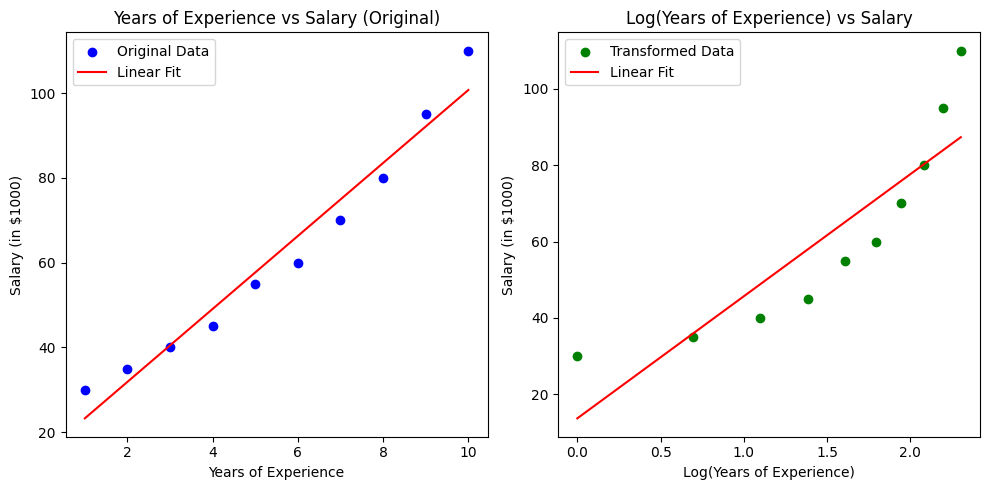

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: years of experience and salary (in thousands)
years_of_experience = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
salary = np.array([30, 35, 40, 45, 55, 60, 70, 80, 95, 110])

# Log transformation of years of experience
log_experience = np.log(years_of_experience)

# Plotting the original data
plt.figure(figsize=(10, 5))

# Subplot 1: Without log transformation
plt.subplot(1, 2, 1)
plt.scatter(years_of_experience, salary, color='blue', label='Original Data')
plt.plot(years_of_experience, np.poly1d(np.polyfit(years_of_experience, salary, 1))(years_of_experience), color='red', label='Linear Fit')
plt.title('Years of Experience vs Salary (Original)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in $1000)')
plt.legend()

# Subplot 2: With log transformation
plt.subplot(1, 2, 2)
plt.scatter(log_experience, salary, color='green', label='Transformed Data')
plt.plot(log_experience, np.poly1d(np.polyfit(log_experience, salary, 1))(log_experience), color='red', label='Linear Fit')
plt.title('Log(Years of Experience) vs Salary')
plt.xlabel('Log(Years of Experience)')
plt.ylabel('Salary (in $1000)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score




In [ ]:
df=pd.read_csv('Carseats.csv')

In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    object 
 6   ShelveLoc    399 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           397 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 34.5+ KB


In [ ]:

missing_cols = df.columns[df.isnull().sum() > 0]

for col in missing_cols:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)


C:\Users\davro\AppData\Local\Temp\ipykernel_1048\597397456.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')




In [ ]:

if df['Price'].isnull().sum() > 0:
    print(f"Found {df['Price'].isnull().sum()} non-numeric or missing values in 'Price'.")

    df['Price'].fillna(df['Price'].mean(), inplace=True)


print("\nAfter cleaning:")
print(df['Price'].head())
print(df.info())

Found 2 non-numeric or missing values in 'Price'.

After cleaning:
0    120.0
1     83.0
2     80.0
3     97.0
4    128.0
Name: Price, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    float64
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 34.5+ KB
None


C:\Users\davro\AppData\Local\Temp\ipykernel_1048\3586727870.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    float64
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 34.5+ KB


In [ ]:
categorical_col=df.select_dtypes(include=['object','category']).columns

In [ ]:
categorical_col

Index(['ShelveLoc', 'Education', 'Urban', 'US'], dtype='object')

In [ ]:
cardinality=df[categorical_col].nunique()

In [ ]:
df['Education'].value_counts()

Education
17     49
10     48
11     48
12     47
16     47
13     43
14     40
18     39
15     36
Yes     3
Name: count, dtype: int64

In [ ]:
cardinality

ShelveLoc     5
Education    10
Urban         2
US            2
dtype: int64

In [ ]:

df['Education'] = pd.to_numeric(df['Education'], errors='coerce')




In [ ]:

if df['Education'].isnull().sum() > 0:
    print(f"Found {df['Education'].isnull().sum()} non-numeric or missing values in 'Education'.")

    df['Education'].fillna(df['Education'].mean(), inplace=True)


print("\nAfter cleaning:")
print(df['Education'].head())
print(df.info())

Found 3 non-numeric or missing values in 'Education'.

After cleaning:
0    17.0
1    10.0
2    12.0
3    14.0
4    13.0
Name: Education, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    float64
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    float64
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 34.5+ KB
None


C:\Users\davro\AppData\Local\Temp\ipykernel_1048\2374791061.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].fillna(df['Education'].mean(), inplace=True)


In [ ]:
df['Education']=df['Education'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    float64
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 34.5+ KB


In [ ]:
cardinality

ShelveLoc     5
Education    10
Urban         2
US            2
dtype: int64

In [ ]:
# Education to Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Education']=label_encoder.fit_transform(df['Education'])


In [ ]:
categorical_col=df.select_dtypes(include=['object','category']).columns

In [ ]:
cardinality=df[categorical_col].nunique()

In [ ]:
encoded_df = pd.get_dummies(df[categorical_col], drop_first=False)

In [ ]:
encoded_df

,ShelveLoc_42,ShelveLoc_69,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,False,False,True,False,False,False,True,False,True
1,False,False,False,True,False,False,True,False,True
2,False,False,False,False,True,False,True,False,True
3,False,False,False,False,True,False,True,False,True
4,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,True,False,False,True,False,True
396,False,False,False,False,True,True,False,False,True
397,False,False,False,False,True,False,True,False,True
398,False,False,True,False,False,False,True,False,True


In [ ]:
df = df.drop(columns=categorical_col)

In [ ]:
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    float64
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_42      400 non-null    bool   
 9   ShelveLoc_69      400 non-null    bool   
 10  ShelveLoc_Bad     400 non-null    bool   
 11  ShelveLoc_Good    400 non-null    bool   
 12  ShelveLoc_Medium  400 non-null    bool   
 13  Urban_No          400 non-null    bool   
 14  Urban_Yes         400 non-null    bool   
 15  US_No             400 non-null    bool   
 16  US_Yes            400 non-null    bool   
dt

In [ ]:
df=df.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sales             400 non-null    int64
 1   CompPrice         400 non-null    int64
 2   Income            400 non-null    int64
 3   Advertising       400 non-null    int64
 4   Population        400 non-null    int64
 5   Price             400 non-null    int64
 6   Age               400 non-null    int64
 7   Education         400 non-null    int64
 8   ShelveLoc_42      400 non-null    int64
 9   ShelveLoc_69      400 non-null    int64
 10  ShelveLoc_Bad     400 non-null    int64
 11  ShelveLoc_Good    400 non-null    int64
 12  ShelveLoc_Medium  400 non-null    int64
 13  Urban_No          400 non-null    int64
 14  Urban_Yes         400 non-null    int64
 15  US_No             400 non-null    int64
 16  US_Yes            400 non-null    int64
dtypes: int64(17)
memory usage: 53.3 KB


In [ ]:
    #Baseline score topish va u orqali yangi yaratilinadigan featurelar bizga + yoki - mi aniqlaymiz
X = df.copy()
y = X.pop("Price")

# Train and score baseline model
baseline = DecisionTreeRegressor(criterion="absolute_error", random_state=42)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 16.95


In [ ]:
#Ovqat qilingandagi maxsulotlar ratiosi(miqdori) ularning umumiy miqdoridan kora muhimroq aniqlovchi.Masalan osh qilingdangi guruch miqdoriga qarab tuz,go'sht solinadi

In [ ]:
#Shuning uchun yuqoridagi featurelarni ratiosi Priceni baxolashimiz uchun muhim factor sanaladi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sales             400 non-null    int64
 1   CompPrice         400 non-null    int64
 2   Income            400 non-null    int64
 3   Advertising       400 non-null    int64
 4   Population        400 non-null    int64
 5   Price             400 non-null    int64
 6   Age               400 non-null    int64
 7   Education         400 non-null    int64
 8   ShelveLoc_42      400 non-null    int64
 9   ShelveLoc_69      400 non-null    int64
 10  ShelveLoc_Bad     400 non-null    int64
 11  ShelveLoc_Good    400 non-null    int64
 12  ShelveLoc_Medium  400 non-null    int64
 13  Urban_No          400 non-null    int64
 14  Urban_Yes         400 non-null    int64
 15  US_No             400 non-null    int64
 16  US_Yes            400 non-null    int64
dtypes: int64(17)
memory usage: 53.3 KB


In [ ]:
df['Advertising']

0      11
1      16
2      10
3       4
4       3
       ..
395    17
396     3
397    12
398     7
399     0
Name: Advertising, Length: 400, dtype: int64

In [ ]:
#Advertising-to-Population Ratio
#Income-to-Population Ratio
#Advertising-to-Income Ratio
#Shelve Location Impact
#Urban Population Ratio
#US Market Presence



In [ ]:
X["AdToPopRatio"] = X["Advertising"] / X["Population"]
X["IncomeToPopRatio"] = X["Income"] / X["Population"]
X["AdToIncomeRatio"] = X["Advertising"] / X["Income"]
X["ShelveLocImpact"] = X["ShelveLoc_42"] + X["ShelveLoc_69"] + X["ShelveLoc_Bad"] + X["ShelveLoc_Good"] + X["ShelveLoc_Medium"]
X["UrbanRatio"] = X["Urban_Yes"] / (X["Urban_Yes"] + X["Urban_No"])
X["USPresence"] = X["US_Yes"] / (X["US_Yes"] + X["US_No"])


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    int64  
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Age               400 non-null    int64  
 6   Education         400 non-null    int64  
 7   ShelveLoc_42      400 non-null    int64  
 8   ShelveLoc_69      400 non-null    int64  
 9   ShelveLoc_Bad     400 non-null    int64  
 10  ShelveLoc_Good    400 non-null    int64  
 11  ShelveLoc_Medium  400 non-null    int64  
 12  Urban_No          400 non-null    int64  
 13  Urban_Yes         400 non-null    int64  
 14  US_No             400 non-null    int64  
 15  US_Yes            400 non-null    int64  
 16  AdToPopRatio      400 non-null    float64
 1

In [ ]:
model = DecisionTreeRegressor(criterion="absolute_error", random_state=0)
score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
score = -1 * score.mean()

print(f"MAE Score with Synthetic Features: {score:.4f}")

MAE Score with Synthetic Features: 16.8100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sales             400 non-null    int64
 1   CompPrice         400 non-null    int64
 2   Income            400 non-null    int64
 3   Advertising       400 non-null    int64
 4   Population        400 non-null    int64
 5   Price             400 non-null    int64
 6   Age               400 non-null    int64
 7   Education         400 non-null    int64
 8   ShelveLoc_42      400 non-null    int64
 9   ShelveLoc_69      400 non-null    int64
 10  ShelveLoc_Bad     400 non-null    int64
 11  ShelveLoc_Good    400 non-null    int64
 12  ShelveLoc_Medium  400 non-null    int64
 13  Urban_No          400 non-null    int64
 14  Urban_Yes         400 non-null    int64
 15  US_No             400 non-null    int64
 16  US_Yes            400 non-null    int64
dtypes: int64(17)
memory usage: 53.3 KB


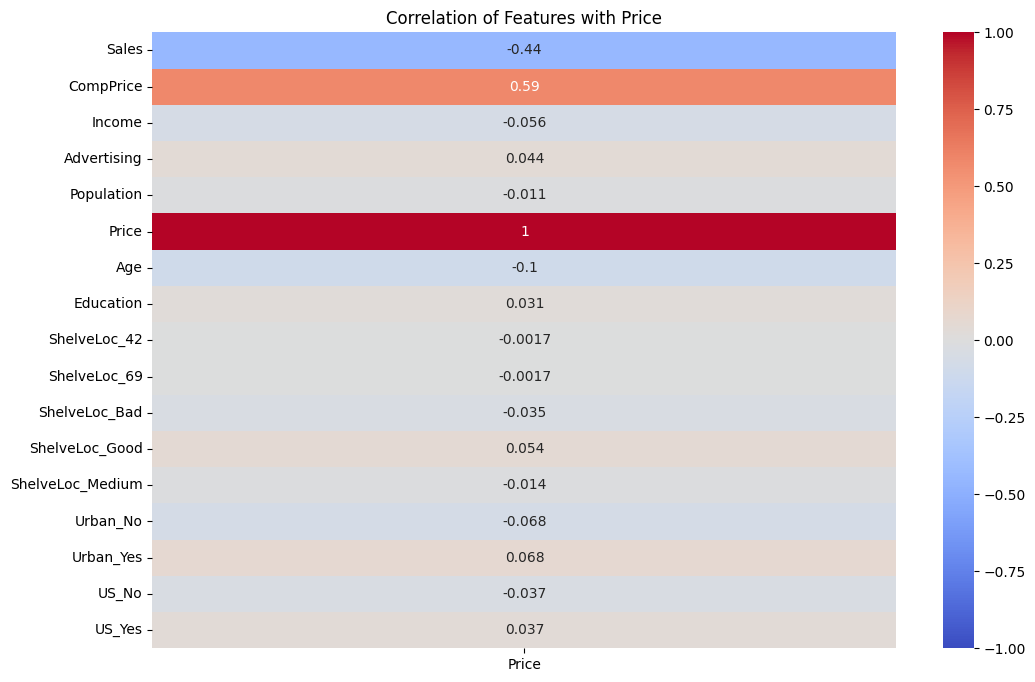

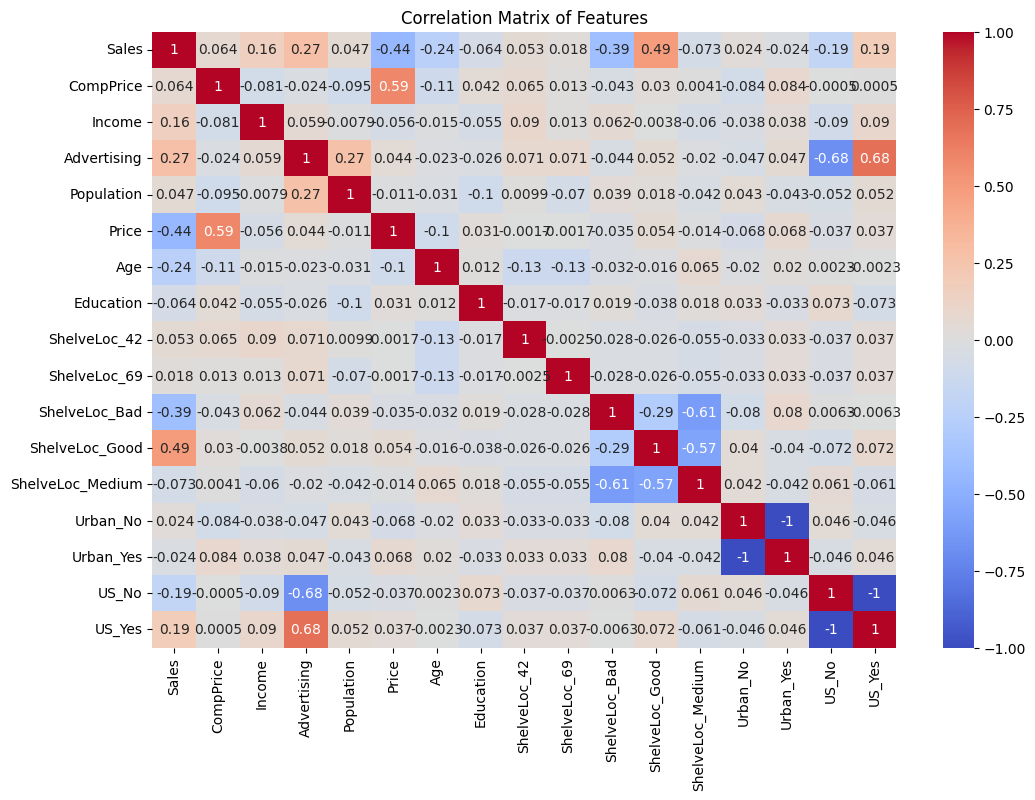

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
X = df.copy()
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Price")
plt.show()

# Check the correlation between all features to spot any potential multicollinearity
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()


In [ ]:
import numpy as np

# Log transformation of skewed features
X['Log_Advertising'] = np.log1p(X['Advertising'])
X['Log_Income'] = np.log1p(X['Income'])

# Polynomial transformation (degree 2 for example)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['Advertising', 'Income', 'Population']])

# Create new polynomial feature names
poly_features = poly.get_feature_names_out(['Advertising', 'Income', 'Population'])
X_poly_df = pd.DataFrame(X_poly, columns=poly_features)

# Add polynomial features to the original dataset
X = pd.concat([X, X_poly_df], axis=1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train and score model with RandomForestRegressor
rf_model = RandomForestRegressor(random_state=0)
rf_score = cross_val_score(rf_model, X, y, cv=5, scoring="neg_mean_absolute_error")
rf_score = -1 * rf_score.mean()

print(f"MAE Score with Random Forest: {rf_score:.4f}")


MAE Score with Random Forest: 0.4751


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train and score model with GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=0)
gb_score = cross_val_score(gb_model, X, y, cv=5, scoring="neg_mean_absolute_error")
gb_score = -1 * gb_score.mean()

print(f"MAE Score with Gradient Boosting: {gb_score:.4f}")


MAE Score with Gradient Boosting: 0.3504


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Train and score different models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0),
}

for model_name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
    score = -1 * score.mean()
    print(f"{model_name} MAE Score: {score:.4f}")


Decision Tree MAE Score: 0.5525
Random Forest MAE Score: 0.4751
Gradient Boosting MAE Score: 0.3504


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Train and score different models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0),
}

# Baseline model - Decision Tree
baseline_model = DecisionTreeRegressor(random_state=0)
baseline_score = cross_val_score(baseline_model, X, y, cv=5, scoring="neg_mean_absolute_error")
baseline_score = -1 * baseline_score.mean()

print(f"Baseline Model (Decision Tree) MAE Score: {baseline_score:.4f}")

# Compare other models
for model_name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
    score = -1 * score.mean()
    print(f"{model_name} MAE Score: {score:.4f}")


Baseline Model (Decision Tree) MAE Score: 0.5525
Decision Tree MAE Score: 0.5525
Random Forest MAE Score: 0.4751
Gradient Boosting MAE Score: 0.3504


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Copy the data and separate features and target
X = df.copy()
y = X.pop("Price")

# Initialize the Gradient Boosting Regressor model (baseline)
model_gb_baseline = GradientBoostingRegressor(random_state=42)

# Train and score baseline Gradient Boosting model using cross-validation
gb_baseline_score = cross_val_score(
    model_gb_baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)

# Convert the negative MAE score to positive
gb_baseline_score = -1 * gb_baseline_score.mean()

print(f"Baseline MAE Score with Gradient Boosting: {gb_baseline_score:.4f}")


Baseline MAE Score with Gradient Boosting: 10.3409


In [ ]:
# Add new synthetic features to the dataset
X["AdToPopRatio"] = X["Advertising"] / X["Population"]
X["IncomeToPopRatio"] = X["Income"] / X["Population"]
X["AdToIncomeRatio"] = X["Advertising"] / X["Income"]
X["ShelveLocImpact"] = X["ShelveLoc_42"] + X["ShelveLoc_69"] + X["ShelveLoc_Bad"] + X["ShelveLoc_Good"] + X["ShelveLoc_Medium"]
X["UrbanRatio"] = X["Urban_Yes"] / (X["Urban_Yes"] + X["Urban_No"])
X["USPresence"] = X["US_Yes"] / (X["US_Yes"] + X["US_No"])


In [ ]:
 #Train and score the model with new features
model_gb_with_new_features = GradientBoostingRegressor(random_state=42)

# Train and score Gradient Boosting model using cross-validation
gb_new_features_score = cross_val_score(
    model_gb_with_new_features, X, y, cv=5, scoring="neg_mean_absolute_error"
)

# Convert the negative MAE score to positive
gb_new_features_score = -1 * gb_new_features_score.mean()

print(f"MAE Score with New Features using Gradient Boosting: {gb_new_features_score:.4f}")

MAE Score with New Features using Gradient Boosting: 10.4605


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Models to compare
models = {
    "Decision Tree": DecisionTreeRegressor(criterion="absolute_error", random_state=0),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0),
}

# Compare MAE scores for baseline vs models with new features
for model_name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
    score = -1 * score.mean()
    print(f"{model_name} MAE Score: {score:.4f}")


Decision Tree MAE Score: 16.8100
Random Forest MAE Score: 12.0675
Gradient Boosting MAE Score: 10.4708


Baseline model yaratish
yangi dataset orqali yangi feature yaratish
Ynagi datasetlarni qo'shganda keyin natijalarni taqqoslash(Random forest v decision tree)
Feature selesction qilihs(Mutual information score)
Yangi structure bilan sinab ko'rish